In [2]:
%pylab inline
import pandas as pd
import fastparquet 
import os,sys

Populating the interactive namespace from numpy and matplotlib


In [3]:
sys.path.insert(0,"/mnt/lanlep2019/src/main")

In [4]:
!ln -s /mnt/lanlep2019 ~/

ln: failed to create symbolic link ‘/home/hadoop/lanlep2019’: File exists


In [5]:
os.chdir("/mnt/lanlep2019/")

In [6]:
!pwd

/mnt/lanlep2019


# once

In [7]:
!pip install hyperopt


    100% |████████████████████████████████| 122kB 3.5MB/s ta 0:00:01
    100% |████████████████████████████████| 1.7MB 862kB/s  eta 0:00:01
    100% |████████████████████████████████| 829kB 1.7MB/s  eta 0:00:01
    100% |████████████████████████████████| 419kB 3.4MB/s  eta 0:00:01
  Running setup.py bdist_wheel for networkx ... done
  Stored in directory: /home/hadoop/.cache/pip/wheels/68/f8/29/b53346a112a07d30a5a84d53f19aeadaa1a474897c0423af91
  Running setup.py bdist_wheel for future ... done
  Stored in directory: /home/hadoop/.cache/pip/wheels/0c/61/d2/d6b7317325828fbb39ee6ad559dbe4664d0896da4721bf379e
Successfully built networkx future
You are using pip version 9.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


# data

In [7]:
import lightgbm as lgb

In [8]:
import data
import config

In [9]:
reload (data)

<module 'data' from '/mnt/lanlep2019/src/main/data.pyc'>

In [10]:
if 1:
    strategy = {'type':'byquake', "test_quakes":[[ 9,  4,  6] , [15,  1,  5], [10, 14,  3],  [7, 11,  2],  [8, 13, 12]]}
    types=['kaggle','signal','kaggle2'] +['fwv','fwvext']+['fwvsoftmax','fwvdis','fwvdis2','fwvcos']+\
        ['fwvextsoftmax','fwvextdis','fwvextdis2','fwvextcos'] + ['fwvwholereg', 'fwvextwholereg']
    traintest = data.TrainTest('dense', coverages=None, types=types, transform=None, valid_strategy=strategy)

In [11]:
traintest.num_dataset()

5

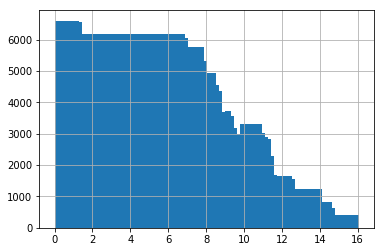

In [12]:
traintest.ydf.hist(bins=100);

In [13]:
np.abs(traintest.ydf-traintest.ydf.median()).mean()

3.02918898210172

In [14]:
testdf=traintest.get_test_data()
testdf.shape

(2624, 450)

In [15]:
datadf=traintest.traindf
datadf.head()

mean        std    max    min  mean_change_abs  \
index                                                                      
quake_03_0200_105000  4.364120   6.262442  119.0 -119.0         0.000000   
quake_06_0120_099000  4.220713  10.566183  328.0 -282.0         0.000007   
quake_07_0296_013500  4.430427   7.501472  159.0 -116.0        -0.000007   
quake_03_0090_034500  4.798247   4.658487  108.0  -76.0         0.000013   
quake_08_0137_055500  4.691327   5.605683  172.0 -171.0        -0.000007   

                      mean_change_rate  abs_max  abs_min  std_first_50000  \
index                                                                       
quake_03_0200_105000      75149.867188    119.0      0.0         4.398645   
quake_06_0120_099000      75124.750000    328.0      0.0         4.937372   
quake_07_0296_013500      74910.898438    159.0      0.0         7.806824   
quake_03_0090_034500      74906.742188    108.0      0.0         5.020636   
quake_08_0137_055500      74864.296875    172.0      0.0         7.771729   

                      std_last_50000       ...         fwvextdis_pca10_2  \
index                                      ...                             
quake_03_0200_105000        7.115628       ...                 -0.867152   
quake_06_0120_099000       17.188982       ...                  0.599042   
quake_07_0296_013500        8.044850       ...                  0.276776   
quake_03_0090_034500        4.439272       ...                 -1.211162   
quake_08_0137_055500        4.222545       ...                 -1.418130   

                      fwvextdis_pca10_3  fwvextdis_pca10_4  fwvextdis_pca10_5  \
index                                                                           
quake_03_0200_105000           0.251729           0.083587           0.029462   
quake_06_0120_099000          -0.058171          -0.059255           0.019930   
quake_07_0296_013500          -0.041059           0.105883           0.042710   
quake_03_0090_034500           0.021516          -0.055162           0.053457   
quake_08_0137_055500          -0.099060          -0.037935          -0.052247   

                      fwvextdis_pca10_6  fwvextdis_pca10_7  fwvextdis_pca10_8  \
index                                                                           
quake_03_0200_105000          -0.022975          -0.039655           0.000274   
quake_06_0120_099000           0.002073           0.007824          -0.008991   
quake_07_0296_013500          -0.009792          -0.018473           0.035101   
quake_03_0090_034500          -0.030760          -0.066036           0.022193   
quake_08_0137_055500           0.054380          -0.019536           0.042780   

                      fwvextdis_pca10_9  fwv_wholereg  fwvext_wholereg  
index                                                                   
quake_03_0200_105000           0.028007     93.940635        -6.822180  
quake_06_0120_099000           0.020008     20.000997       -12.672698  
quake_07_0296_013500          -0.005669     37.947210       -38.633617  
quake_03_0090_034500           0.016614     80.679887        11.746026  
quake_08_0137_055500           0.010705     53.077711         4.727631  

[5 rows x 450 columns]

In [16]:
ydf=traintest.ydf
ydf.head()

index
quake_03_0200_105000    0.998098
quake_06_0120_099000    2.318898
quake_07_0296_013500    4.532197
quake_03_0090_034500    5.302996
quake_08_0137_055500    2.514399
Name: y, dtype: float64

In [17]:
qdf=pd.DataFrame(datadf.index.map(lambda u: u.split("_")[1]).astype(np.int8),index=datadf.index)
qdf.head()

index
index                      
quake_03_0200_105000      3
quake_06_0120_099000      6
quake_07_0296_013500      7
quake_03_0090_034500      3
quake_08_0137_055500      8

In [18]:
qdf['index'].value_counts().to_frame().sort_index().T

0      1      2      3      4      5      6      7      8      9   \
index  3672  29520  36295  22631  32480  20574  18018  41240  20192  24635   

          10     11     12     13     14     15    16  
index  29228  28196  22560  21885  37761  24179  4674

In [19]:
qdf.shape,ydf.shape,datadf.shape

((417740, 1), (417740,), (417740, 450))

In [20]:
quakes=range(1,16)
quakes

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [21]:
idx=qdf['index'].isin(set(quakes)).values
ydf=ydf[idx]
qdf=qdf[idx]
datadf=datadf[idx]

In [22]:
rawydf=ydf


In [23]:
qdf.shape,ydf.shape,datadf.shape

((409394, 1), (409394,), (409394, 450))

In [24]:
quake_duration= config.quake_length
quake_duration

{1: 11.540566395569977,
 2: 14.180203599212305,
 3: 8.856243408447243,
 4: 12.693878224447909,
 5: 8.05509606419685,
 6: 7.059247509412199,
 7: 16.107000305270187,
 8: 7.906144318432936,
 9: 9.637176132666621,
 10: 11.4267247041647,
 11: 11.0245547308509,
 12: 8.828581201128031,
 13: 8.565787763958841,
 14: 14.7515396785698,
 15: 9.459497978791095}

In [25]:
def align_q(t):
    print 'align to ', t
    ydf=rawydf.copy()
    for qno in quakes:
        r=t/quake_duration[qno]
        print qno, r
        ydf.loc[qdf['index']==qno] *= r
    return ydf

align to  11
1 0.95315945708
2 0.775729341475
3 1.24206161605
4 0.866559439558
5 1.36559513534
6 1.55823973948
7 0.682932873379
8 1.39132294542
9 1.14141319496
10 0.962655553957
11 0.997772723575
12 1.24595331338
13 1.28417844373
14 0.745684873558
15 1.16285240767


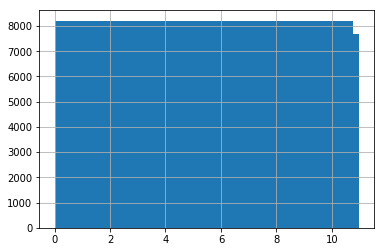

In [26]:
align_q(11).hist(bins=50);

In [27]:
import utils
n_thread= utils.get_num_thread()
n_thread

35

In [28]:
str(config.quake_weights)

'{1: 1.25, 2: 0.666666666666667, 3: 0.25, 4: 1.25, 5: 0.25, 6: 0.25, 7: 0.666666666666667, 8: 0.25, 9: 0.25, 10: 1.25, 11: 1.25, 12: 0.25, 13: 0.25, 14: 0.666666666666667, 15: 0.25}'

In [29]:
str(config.target_lengths)

'[11.4252837645, 12.6407394841, 11.6683749084, 7.0496431738, 11.4252837645, 16.5301977869, 9.723645757, 12.6407394841, 16.5301977869]'

In [30]:
w={k:v/np.mean(config.quake_weights.values()) for k,v in config.quake_weights.items()}
wdf=qdf['index'].map(lambda u: w[u])
wdf.head()

index
quake_03_0200_105000    0.416667
quake_06_0120_099000    0.416667
quake_07_0296_013500    1.111111
quake_03_0090_034500    0.416667
quake_08_0137_055500    0.416667
Name: index, dtype: float64

In [31]:
GNO=402
for u in range(len(config.target_lengths)):
    !mkdir -p input/sub/{GNO}/{u}

In [32]:
sub_path=os.path.join(config.INPUT_PATH, "sub", str(GNO))
sub_path

'/home/hadoop/lanlep2019/input/sub/402'

In [33]:
def make_sub(model, qno):
    fname =os.path.join(sub_path, str(targetno), "sub{}_q{}_at_s{}.csv".format(GNO,qno, randseed, targetno))
    print "write to " + fname    
    p = model.predict(testdf.values, num_iteration = model.best_iteration)
    p = pd.DataFrame(p, index=testdf.index).reset_index()
    p.columns=['seg_id','time_to_failure']
    p.to_csv(fname,index=None)

                        
    

In [34]:
def train_quake(qno,params,n_thread):
    assert(qno in quakes)
    print 'valid quake', qno
    teidx=(qdf['index']==qno).values
    tridx=~qdf['index'].isin({qno,0,16}).values
    
    t=config.target_lengths[targetno]
    ydf=align_q(t)    
    Xtr,ytr,Xte,yte=datadf[tridx],ydf[tridx],datadf[teidx],ydf[teidx]
    Wtr,Wte=wdf[tridx],wdf[teidx]
    Xtr,ytr,Xte,yte, Wtr, Wte=[u.values for u in [Xtr,ytr,Xte,yte, Wtr,Wte]]
    print Xtr.shape,ytr.shape,Xte.shape,yte.shape
    model = lgb.LGBMRegressor(n_estimators = 5000, n_jobs = n_thread, **params)
    model.fit(Xtr, ytr, sample_weight=Wtr,
                    eval_set=[(Xtr, ytr), (Xte, yte)], eval_metric='mae', eval_sample_weight=[Wtr,None],
                    verbose=100, early_stopping_rounds=100)
    make_sub(model, qno)
    return model.best_score['valid_1']['l1'], model.best_iteration

In [35]:
params = {'num_leaves': 54,
          'min_data_in_leaf': 79,
          'objective': 'huber',
          'max_depth': -1,
          'learning_rate': 0.01,
          "boosting": "gbdt",
          "bagging_freq": 5,
          "bagging_fraction": 0.8126672064208567,
          "metric": 'mae',
          'seed': 1,
          "verbosity": -1,
          'reg_alpha': 0.1302650970728192,
          'reg_lambda': 0.3603427518866501
         }

In [36]:
best_mae=1e10

In [42]:
def lgbcv(learning_rate, num_leaves,reg_alpha,reg_lambda,max_depth,subsample,colsample_bytree, min_data_in_leaf,min_sum_hessian_in_leaf, seed,huber_delta):
    d=locals()
    newparams=params.copy()
    newparams.update(d)    
    newparams['num_leaves']=int(num_leaves)
    newparams['max_depth']=int(max_depth)
    newparams['min_data_in_leaf']=int(min_data_in_leaf)
    scores=[]
    validScores={}
    for qno in quakes:
        s=train_quake(qno,newparams,n_thread)
        print "quake ", qno,s
        validScores[qno]=s
        scores.append(s[0])
    r=np.mean(scores)
    global best_mae
    if best_mae>r: best_mae=r
    print "mean score", r
    return r

In [43]:
best={'colsample_bytree': 0.5195128621758713,
 'huber_delta': 1.0334464056698902,
 'learning_rate': 0.003544100331201989,
 'max_depth': 8.243751705775598,
 'min_data_in_leaf': 11.25982209661602,
 'min_sum_hessian_in_leaf': 0.06695552383553482,
 'num_leaves': 86.84503903523397,
 'reg_alpha': 0.015753824888055008,
 'reg_lambda': 9.027729201660977,
 'subsample': 0.5888815261107462}


In [44]:
import time


In [45]:
while True:
    if os.path.exists("/mnt/done401"):
        break
    else:
        time.sleep(60) 

In [ ]:
scores={}

In [48]:

for targetno in range(0,len(config.target_lengths)):
    ascores=[]
    for _ in range(2):
        randseed=np.random.randint(low=1, high=11111111)
        best['seed']=randseed
        a=lgbcv(**best)
        ascores.append(a)
    scores[targetno]=ascores

valid quake 1
align to  11.4252837645
1 0.990010660905
2 0.805720713709
3 1.29008240148
4 0.900062499615
5 1.41839199352
6 1.61848465424
7 0.709336533679
8 1.44511449631
9 1.185542695
10 0.999873897403
11 1.03634877267
12 1.29412456025
13 1.33382755671
14 0.774514661754
15 1.20781079399
(379874, 450) (379874,) (29520, 450) (29520,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.90624	valid_1's l1: 1.97873
[200]	training's l1: 1.47325	valid_1's l1: 1.68445
[300]	training's l1: 1.24651	valid_1's l1: 1.53549
[400]	training's l1: 1.10534	valid_1's l1: 1.44442
[500]	training's l1: 1.01296	valid_1's l1: 1.38592
[600]	training's l1: 0.94964	valid_1's l1: 1.34639
[700]	training's l1: 0.903785	valid_1's l1: 1.31974
[800]	training's l1: 0.868031	valid_1's l1: 1.30119
[900]	training's l1: 0.839302	valid_1's l1: 1.28949
[1000]	training's l1: 0.814935	valid_1's l1: 1.28205
[1100]	training's l1: 0.793303	valid_1's l1: 1.27667
[1200]	training's l1: 0.773645	vali

[500]	training's l1: 1.04696	valid_1's l1: 1.54903
[600]	training's l1: 0.979016	valid_1's l1: 1.53402
[700]	training's l1: 0.92929	valid_1's l1: 1.52308
[800]	training's l1: 0.891414	valid_1's l1: 1.5154
[900]	training's l1: 0.861124	valid_1's l1: 1.50832
[1000]	training's l1: 0.835331	valid_1's l1: 1.50276
[1100]	training's l1: 0.812956	valid_1's l1: 1.49822
[1200]	training's l1: 0.79261	valid_1's l1: 1.49448
[1300]	training's l1: 0.773176	valid_1's l1: 1.49204
[1400]	training's l1: 0.755462	valid_1's l1: 1.48994
[1500]	training's l1: 0.739324	valid_1's l1: 1.48795
[1600]	training's l1: 0.724979	valid_1's l1: 1.48596
[1700]	training's l1: 0.711406	valid_1's l1: 1.48424
[1800]	training's l1: 0.698203	valid_1's l1: 1.48241
[1900]	training's l1: 0.685756	valid_1's l1: 1.48186
[2000]	training's l1: 0.673499	valid_1's l1: 1.4804
[2100]	training's l1: 0.66212	valid_1's l1: 1.47931
[2200]	training's l1: 0.650541	valid_1's l1: 1.47842
[2300]	training's l1: 0.638978	valid_1's l1: 1.47681
[240

[2100]	training's l1: 0.658214	valid_1's l1: 1.54749
[2200]	training's l1: 0.646756	valid_1's l1: 1.54564
[2300]	training's l1: 0.636147	valid_1's l1: 1.54351
[2400]	training's l1: 0.625935	valid_1's l1: 1.54144
[2500]	training's l1: 0.616626	valid_1's l1: 1.53989
[2600]	training's l1: 0.607107	valid_1's l1: 1.53826
[2700]	training's l1: 0.598283	valid_1's l1: 1.53696
[2800]	training's l1: 0.589234	valid_1's l1: 1.5352
[2900]	training's l1: 0.580502	valid_1's l1: 1.53387
[3000]	training's l1: 0.571477	valid_1's l1: 1.53233
[3100]	training's l1: 0.562743	valid_1's l1: 1.53097
[3200]	training's l1: 0.554568	valid_1's l1: 1.52942
[3300]	training's l1: 0.546608	valid_1's l1: 1.52822
[3400]	training's l1: 0.538546	valid_1's l1: 1.52709
[3500]	training's l1: 0.531045	valid_1's l1: 1.52616
[3600]	training's l1: 0.523841	valid_1's l1: 1.52473
[3700]	training's l1: 0.516402	valid_1's l1: 1.52335
[3800]	training's l1: 0.509168	valid_1's l1: 1.52204
[3900]	training's l1: 0.502149	valid_1's l1: 1.

[4200]	training's l1: 0.488514	valid_1's l1: 1.04273
[4300]	training's l1: 0.482945	valid_1's l1: 1.04229
[4400]	training's l1: 0.477729	valid_1's l1: 1.04196
[4500]	training's l1: 0.471515	valid_1's l1: 1.04174
[4600]	training's l1: 0.466148	valid_1's l1: 1.04122
[4700]	training's l1: 0.460767	valid_1's l1: 1.04116
Early stopping, best iteration is:
[4625]	training's l1: 0.464813	valid_1's l1: 1.04108
write to /home/hadoop/lanlep2019/input/sub/402/4/sub402_q12_at_s2984793.csv
quake  12 (1.041077968810387, 4625)
valid quake 13
align to  11.4252837645
1 0.990010660905
2 0.805720713709
3 1.29008240148
4 0.900062499615
5 1.41839199352
6 1.61848465424
7 0.709336533679
8 1.44511449631
9 1.185542695
10 0.999873897403
11 1.03634877267
12 1.29412456025
13 1.33382755671
14 0.774514661754
15 1.20781079399
(387509, 450) (387509,) (21885, 450) (21885,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.96554	valid_1's l1: 1.8533
[200]	training's l1: 1.5162	valid_

[800]	training's l1: 0.880297	valid_1's l1: 1.34826
[900]	training's l1: 0.848734	valid_1's l1: 1.33209
[1000]	training's l1: 0.822724	valid_1's l1: 1.31904
[1100]	training's l1: 0.80002	valid_1's l1: 1.31066
[1200]	training's l1: 0.779119	valid_1's l1: 1.30449
[1300]	training's l1: 0.759432	valid_1's l1: 1.30006
[1400]	training's l1: 0.74079	valid_1's l1: 1.29596
[1500]	training's l1: 0.723887	valid_1's l1: 1.29367
[1600]	training's l1: 0.708799	valid_1's l1: 1.29194
[1700]	training's l1: 0.695195	valid_1's l1: 1.29057
[1800]	training's l1: 0.681947	valid_1's l1: 1.28937
[1900]	training's l1: 0.669722	valid_1's l1: 1.28839
[2000]	training's l1: 0.657653	valid_1's l1: 1.28807
Early stopping, best iteration is:
[1972]	training's l1: 0.660965	valid_1's l1: 1.28796
write to /home/hadoop/lanlep2019/input/sub/402/4/sub402_q2_at_s3095127.csv
quake  2 (1.287956133593512, 1972)
valid quake 3
align to  11.4252837645
1 0.990010660905
2 0.805720713709
3 1.29008240148
4 0.900062499615
5 1.41839199

6 1.61848465424
7 0.709336533679
8 1.44511449631
9 1.185542695
10 0.999873897403
11 1.03634877267
12 1.29412456025
13 1.33382755671
14 0.774514661754
15 1.20781079399
(368154, 450) (368154,) (41240, 450) (41240,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.96993	valid_1's l1: 2.18241
[200]	training's l1: 1.51074	valid_1's l1: 1.88491
[300]	training's l1: 1.28152	valid_1's l1: 1.70746
[400]	training's l1: 1.13259	valid_1's l1: 1.59263
[500]	training's l1: 1.03134	valid_1's l1: 1.51567
[600]	training's l1: 0.959757	valid_1's l1: 1.46436
[700]	training's l1: 0.906922	valid_1's l1: 1.43267
[800]	training's l1: 0.86675	valid_1's l1: 1.4123
[900]	training's l1: 0.834504	valid_1's l1: 1.39883
[1000]	training's l1: 0.807034	valid_1's l1: 1.38968
[1100]	training's l1: 0.783215	valid_1's l1: 1.3837
[1200]	training's l1: 0.761666	valid_1's l1: 1.37981
[1300]	training's l1: 0.741547	valid_1's l1: 1.37841
[1400]	training's l1: 0.722999	valid_1's l1: 1.37764

[300]	training's l1: 1.27845	valid_1's l1: 1.27212
[400]	training's l1: 1.13827	valid_1's l1: 1.15173
[500]	training's l1: 1.04329	valid_1's l1: 1.08867
[600]	training's l1: 0.976382	valid_1's l1: 1.05365
[700]	training's l1: 0.926437	valid_1's l1: 1.0326
[800]	training's l1: 0.888407	valid_1's l1: 1.021
[900]	training's l1: 0.857152	valid_1's l1: 1.01313
[1000]	training's l1: 0.830501	valid_1's l1: 1.00818
[1100]	training's l1: 0.806991	valid_1's l1: 1.00589
[1200]	training's l1: 0.785658	valid_1's l1: 1.00445
[1300]	training's l1: 0.765855	valid_1's l1: 1.00321
[1400]	training's l1: 0.747898	valid_1's l1: 1.00324
Early stopping, best iteration is:
[1319]	training's l1: 0.7622	valid_1's l1: 1.00291
write to /home/hadoop/lanlep2019/input/sub/402/4/sub402_q10_at_s3095127.csv
quake  10 (1.0029144422696132, 1319)
valid quake 11
align to  11.4252837645
1 0.990010660905
2 0.805720713709
3 1.29008240148
4 0.900062499615
5 1.41839199352
6 1.61848465424
7 0.709336533679
8 1.44511449631
9 1.185

2 0.805720713709
3 1.29008240148
4 0.900062499615
5 1.41839199352
6 1.61848465424
7 0.709336533679
8 1.44511449631
9 1.185542695
10 0.999873897403
11 1.03634877267
12 1.29412456025
13 1.33382755671
14 0.774514661754
15 1.20781079399
(371633, 450) (371633,) (37761, 450) (37761,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.9671	valid_1's l1: 2.16872
[200]	training's l1: 1.50963	valid_1's l1: 1.83735
[300]	training's l1: 1.27944	valid_1's l1: 1.67574
[400]	training's l1: 1.13105	valid_1's l1: 1.5753
[500]	training's l1: 1.03104	valid_1's l1: 1.50965
[600]	training's l1: 0.960925	valid_1's l1: 1.46815
[700]	training's l1: 0.90934	valid_1's l1: 1.44449
[800]	training's l1: 0.869897	valid_1's l1: 1.43043
[900]	training's l1: 0.83805	valid_1's l1: 1.41981
[1000]	training's l1: 0.81147	valid_1's l1: 1.41373
[1100]	training's l1: 0.787699	valid_1's l1: 1.41212
[1200]	training's l1: 0.766277	valid_1's l1: 1.41131
[1300]	training's l1: 0.746435	valid_1's 

4 1.30221808455
5 2.05214160764
6 2.34163737209
7 1.02627413383
8 2.09080395211
9 1.71525326085
10 1.44662606432
11 1.49939822428
12 1.87235042758
13 1.92979306077
14 1.12057440424
15 1.74747093598
(376914, 450) (376914,) (32480, 450) (32480,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 2.73992	valid_1's l1: 2.79562
[200]	training's l1: 2.10627	valid_1's l1: 2.1776
[300]	training's l1: 1.79612	valid_1's l1: 1.89652
[400]	training's l1: 1.60742	valid_1's l1: 1.75889
[500]	training's l1: 1.48218	valid_1's l1: 1.6845
[600]	training's l1: 1.3933	valid_1's l1: 1.6467
[700]	training's l1: 1.32688	valid_1's l1: 1.62935
[800]	training's l1: 1.27459	valid_1's l1: 1.62243
[900]	training's l1: 1.23099	valid_1's l1: 1.6216
Early stopping, best iteration is:
[864]	training's l1: 1.24581	valid_1's l1: 1.62072
write to /home/hadoop/lanlep2019/input/sub/402/5/sub402_q4_at_s5532469.csv
quake  4 (1.6207239618668108, 864)
valid quake 5
align to  16.5301977869
1 1.4

[1400]	training's l1: 1.04699	valid_1's l1: 1.99599
[1500]	training's l1: 1.02367	valid_1's l1: 1.99505
[1600]	training's l1: 1.00095	valid_1's l1: 1.99463
[1700]	training's l1: 0.980719	valid_1's l1: 1.99414
[1800]	training's l1: 0.961444	valid_1's l1: 1.99389
Early stopping, best iteration is:
[1729]	training's l1: 0.975431	valid_1's l1: 1.99369
write to /home/hadoop/lanlep2019/input/sub/402/5/sub402_q7_at_s5532469.csv
quake  7 (1.9936928972907513, 1729)
valid quake 8
align to  16.5301977869
1 1.43235584982
2 1.16572358579
3 1.86650219789
4 1.30221808455
5 2.05214160764
6 2.34163737209
7 1.02627413383
8 2.09080395211
9 1.71525326085
10 1.44662606432
11 1.49939822428
12 1.87235042758
13 1.92979306077
14 1.12057440424
15 1.74747093598
(389202, 450) (389202,) (20192, 450) (20192,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 2.81984	valid_1's l1: 2.8233
[200]	training's l1: 2.13541	valid_1's l1: 2.39414
[300]	training's l1: 1.81748	valid_1's l1: 2.

[1900]	training's l1: 0.996599	valid_1's l1: 1.54379
[2000]	training's l1: 0.979692	valid_1's l1: 1.54107
[2100]	training's l1: 0.963625	valid_1's l1: 1.53865
[2200]	training's l1: 0.948875	valid_1's l1: 1.53642
[2300]	training's l1: 0.93361	valid_1's l1: 1.53477
[2400]	training's l1: 0.918725	valid_1's l1: 1.53343
[2500]	training's l1: 0.905142	valid_1's l1: 1.53155
[2600]	training's l1: 0.890508	valid_1's l1: 1.52991
[2700]	training's l1: 0.877229	valid_1's l1: 1.52901
[2800]	training's l1: 0.863924	valid_1's l1: 1.52796
[2900]	training's l1: 0.851919	valid_1's l1: 1.52643
[3000]	training's l1: 0.840452	valid_1's l1: 1.52552
[3100]	training's l1: 0.828779	valid_1's l1: 1.52458
[3200]	training's l1: 0.816917	valid_1's l1: 1.52314
[3300]	training's l1: 0.806189	valid_1's l1: 1.5222
[3400]	training's l1: 0.796587	valid_1's l1: 1.52079
[3500]	training's l1: 0.786042	valid_1's l1: 1.51963
[3600]	training's l1: 0.775766	valid_1's l1: 1.51871
[3700]	training's l1: 0.765841	valid_1's l1: 1.5

[3300]	training's l1: 0.800278	valid_1's l1: 1.88164
[3400]	training's l1: 0.78856	valid_1's l1: 1.88025
[3500]	training's l1: 0.777769	valid_1's l1: 1.87868
[3600]	training's l1: 0.767651	valid_1's l1: 1.87696
[3700]	training's l1: 0.757716	valid_1's l1: 1.8757
[3800]	training's l1: 0.747041	valid_1's l1: 1.87399
[3900]	training's l1: 0.737172	valid_1's l1: 1.87242
[4000]	training's l1: 0.727934	valid_1's l1: 1.87091
[4100]	training's l1: 0.718831	valid_1's l1: 1.86941
[4200]	training's l1: 0.70947	valid_1's l1: 1.86838
[4300]	training's l1: 0.700584	valid_1's l1: 1.86759
[4400]	training's l1: 0.692424	valid_1's l1: 1.86664
[4500]	training's l1: 0.684065	valid_1's l1: 1.8655
[4600]	training's l1: 0.675853	valid_1's l1: 1.86434
[4700]	training's l1: 0.667803	valid_1's l1: 1.86364
[4800]	training's l1: 0.660461	valid_1's l1: 1.86251
[4900]	training's l1: 0.653499	valid_1's l1: 1.86136
[5000]	training's l1: 0.645918	valid_1's l1: 1.86038
write to /home/hadoop/lanlep2019/input/sub/402/5/s

[100]	training's l1: 2.73925	valid_1's l1: 2.78005
[200]	training's l1: 2.10676	valid_1's l1: 2.172
[300]	training's l1: 1.7959	valid_1's l1: 1.89396
[400]	training's l1: 1.60595	valid_1's l1: 1.75374
[500]	training's l1: 1.48087	valid_1's l1: 1.67898
[600]	training's l1: 1.3923	valid_1's l1: 1.64405
[700]	training's l1: 1.32665	valid_1's l1: 1.62859
[800]	training's l1: 1.2745	valid_1's l1: 1.62292
[900]	training's l1: 1.23071	valid_1's l1: 1.62183
Early stopping, best iteration is:
[869]	training's l1: 1.24333	valid_1's l1: 1.62154
write to /home/hadoop/lanlep2019/input/sub/402/5/sub402_q4_at_s5308011.csv
quake  4 (1.6215363504713, 869)
valid quake 5
align to  16.5301977869
1 1.43235584982
2 1.16572358579
3 1.86650219789
4 1.30221808455
5 2.05214160764
6 2.34163737209
7 1.02627413383
8 2.09080395211
9 1.71525326085
10 1.44662606432
11 1.49939822428
12 1.87235042758
13 1.92979306077
14 1.12057440424
15 1.74747093598
(388820, 450) (388820,) (20574, 450) (20574,)
Training until validati

[2100]	training's l1: 0.954624	valid_1's l1: 2.25919
[2200]	training's l1: 0.939444	valid_1's l1: 2.25612
[2300]	training's l1: 0.924095	valid_1's l1: 2.2533
[2400]	training's l1: 0.909223	valid_1's l1: 2.25138
[2500]	training's l1: 0.895605	valid_1's l1: 2.2485
[2600]	training's l1: 0.882387	valid_1's l1: 2.24652
[2700]	training's l1: 0.869448	valid_1's l1: 2.24383
[2800]	training's l1: 0.85656	valid_1's l1: 2.24146
[2900]	training's l1: 0.844457	valid_1's l1: 2.23914
[3000]	training's l1: 0.832216	valid_1's l1: 2.23711
[3100]	training's l1: 0.820319	valid_1's l1: 2.23497
[3200]	training's l1: 0.809245	valid_1's l1: 2.23305
[3300]	training's l1: 0.797725	valid_1's l1: 2.23109
[3400]	training's l1: 0.786949	valid_1's l1: 2.22938
[3500]	training's l1: 0.77625	valid_1's l1: 2.2274
[3600]	training's l1: 0.765624	valid_1's l1: 2.22516
[3700]	training's l1: 0.755755	valid_1's l1: 2.22375
[3800]	training's l1: 0.746692	valid_1's l1: 2.22254
[3900]	training's l1: 0.73703	valid_1's l1: 2.22075

[1100]	training's l1: 1.17842	valid_1's l1: 1.59312
[1200]	training's l1: 1.15017	valid_1's l1: 1.58585
[1300]	training's l1: 1.12313	valid_1's l1: 1.5794
[1400]	training's l1: 1.09799	valid_1's l1: 1.57478
[1500]	training's l1: 1.07485	valid_1's l1: 1.57106
[1600]	training's l1: 1.05391	valid_1's l1: 1.56715
[1700]	training's l1: 1.03504	valid_1's l1: 1.56354
[1800]	training's l1: 1.01639	valid_1's l1: 1.56069
[1900]	training's l1: 0.997392	valid_1's l1: 1.5583
[2000]	training's l1: 0.980687	valid_1's l1: 1.55557
[2100]	training's l1: 0.964598	valid_1's l1: 1.55347
[2200]	training's l1: 0.949568	valid_1's l1: 1.55193
[2300]	training's l1: 0.934411	valid_1's l1: 1.55016
[2400]	training's l1: 0.918893	valid_1's l1: 1.54922
[2500]	training's l1: 0.905064	valid_1's l1: 1.54733
[2600]	training's l1: 0.890333	valid_1's l1: 1.54542
[2700]	training's l1: 0.876235	valid_1's l1: 1.54391
[2800]	training's l1: 0.863001	valid_1's l1: 1.54262
[2900]	training's l1: 0.850228	valid_1's l1: 1.5407
[300

[700]	training's l1: 0.772764	valid_1's l1: 1.11584
[800]	training's l1: 0.742108	valid_1's l1: 1.09979
[900]	training's l1: 0.717134	valid_1's l1: 1.08946
[1000]	training's l1: 0.695815	valid_1's l1: 1.08337
[1100]	training's l1: 0.676854	valid_1's l1: 1.07872
[1200]	training's l1: 0.659584	valid_1's l1: 1.07553
[1300]	training's l1: 0.642479	valid_1's l1: 1.07273
[1400]	training's l1: 0.626791	valid_1's l1: 1.07113
[1500]	training's l1: 0.613929	valid_1's l1: 1.06988
[1600]	training's l1: 0.601949	valid_1's l1: 1.06949
[1700]	training's l1: 0.590264	valid_1's l1: 1.06864
[1800]	training's l1: 0.578986	valid_1's l1: 1.06836
[1900]	training's l1: 0.567702	valid_1's l1: 1.06807
Early stopping, best iteration is:
[1892]	training's l1: 0.568562	valid_1's l1: 1.06804
write to /home/hadoop/lanlep2019/input/sub/402/6/sub402_q1_at_s8602581.csv
quake  1 (1.068036921215732, 1892)
valid quake 2
align to  9.723645757
1 0.842562264598
2 0.685719756347
3 1.09794246935
4 0.766010637968
5 1.207142122

13 1.13517238869
14 0.659161414257
15 1.02792407999
(391376, 450) (391376,) (18018, 450) (18018,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.67998	valid_1's l1: 1.78094
[200]	training's l1: 1.30683	valid_1's l1: 1.53675
[300]	training's l1: 1.1127	valid_1's l1: 1.42252
[400]	training's l1: 0.985969	valid_1's l1: 1.35463
[500]	training's l1: 0.900592	valid_1's l1: 1.31063
[600]	training's l1: 0.841161	valid_1's l1: 1.28357
[700]	training's l1: 0.797652	valid_1's l1: 1.26693
[800]	training's l1: 0.764995	valid_1's l1: 1.25503
[900]	training's l1: 0.738566	valid_1's l1: 1.24455
[1000]	training's l1: 0.715999	valid_1's l1: 1.23787
[1100]	training's l1: 0.696238	valid_1's l1: 1.23371
[1200]	training's l1: 0.678191	valid_1's l1: 1.2306
[1300]	training's l1: 0.661213	valid_1's l1: 1.22843
[1400]	training's l1: 0.645585	valid_1's l1: 1.22725
[1500]	training's l1: 0.632162	valid_1's l1: 1.22648
[1600]	training's l1: 0.620004	valid_1's l1: 1.22549
[1700

[700]	training's l1: 0.80277	valid_1's l1: 0.874901
[800]	training's l1: 0.769163	valid_1's l1: 0.859694
[900]	training's l1: 0.742214	valid_1's l1: 0.850187
[1000]	training's l1: 0.719264	valid_1's l1: 0.844195
[1100]	training's l1: 0.699415	valid_1's l1: 0.840101
[1200]	training's l1: 0.680858	valid_1's l1: 0.837576
[1300]	training's l1: 0.66371	valid_1's l1: 0.835852
[1400]	training's l1: 0.6482	valid_1's l1: 0.834853
[1500]	training's l1: 0.634625	valid_1's l1: 0.834307
[1600]	training's l1: 0.622561	valid_1's l1: 0.834025
Early stopping, best iteration is:
[1585]	training's l1: 0.624491	valid_1's l1: 0.833941
write to /home/hadoop/lanlep2019/input/sub/402/6/sub402_q9_at_s8602581.csv
quake  9 (0.8339410764352543, 1585)
valid quake 10
align to  9.723645757
1 0.842562264598
2 0.685719756347
3 1.09794246935
4 0.766010637968
5 1.20714212214
6 1.37743374829
7 0.603690666959
8 1.22988467771
9 1.00897250638
10 0.850956508426
11 0.881998955458
12 1.10138260446
13 1.13517238869
14 0.6591614

[2900]	training's l1: 0.495366	valid_1's l1: 1.01019
[3000]	training's l1: 0.48825	valid_1's l1: 1.00872
[3100]	training's l1: 0.480499	valid_1's l1: 1.00796
[3200]	training's l1: 0.473059	valid_1's l1: 1.0067
[3300]	training's l1: 0.466369	valid_1's l1: 1.0055
[3400]	training's l1: 0.460134	valid_1's l1: 1.0043
[3500]	training's l1: 0.453694	valid_1's l1: 1.00297
[3600]	training's l1: 0.447365	valid_1's l1: 1.0015
[3700]	training's l1: 0.441011	valid_1's l1: 1.00009
[3800]	training's l1: 0.434964	valid_1's l1: 0.998409
[3900]	training's l1: 0.429171	valid_1's l1: 0.996607
[4000]	training's l1: 0.423637	valid_1's l1: 0.994482
[4100]	training's l1: 0.418175	valid_1's l1: 0.992829
[4200]	training's l1: 0.413202	valid_1's l1: 0.99111
[4300]	training's l1: 0.407762	valid_1's l1: 0.989848
[4400]	training's l1: 0.403055	valid_1's l1: 0.988942
[4500]	training's l1: 0.397982	valid_1's l1: 0.9877
[4600]	training's l1: 0.392785	valid_1's l1: 0.986908
[4700]	training's l1: 0.387689	valid_1's l1: 

write to /home/hadoop/lanlep2019/input/sub/402/6/sub402_q3_at_s7453462.csv
quake  3 (0.7988197114348123, 1743)
valid quake 4
align to  9.723645757
1 0.842562264598
2 0.685719756347
3 1.09794246935
4 0.766010637968
5 1.20714212214
6 1.37743374829
7 0.603690666959
8 1.22988467771
9 1.00897250638
10 0.850956508426
11 0.881998955458
12 1.10138260446
13 1.13517238869
14 0.659161414257
15 1.02792407999
(376914, 450) (376914,) (32480, 450) (32480,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.63739	valid_1's l1: 1.64441
[200]	training's l1: 1.28175	valid_1's l1: 1.2964
[300]	training's l1: 1.09263	valid_1's l1: 1.13161
[400]	training's l1: 0.971709	valid_1's l1: 1.04333
[500]	training's l1: 0.89061	valid_1's l1: 0.996106
[600]	training's l1: 0.833902	valid_1's l1: 0.973913
[700]	training's l1: 0.791845	valid_1's l1: 0.963897
[800]	training's l1: 0.75912	valid_1's l1: 0.959789
[900]	training's l1: 0.732337	valid_1's l1: 0.959298
[1000]	training's l1: 0.

[1200]	training's l1: 0.649139	valid_1's l1: 1.17359
[1300]	training's l1: 0.631343	valid_1's l1: 1.17191
[1400]	training's l1: 0.615419	valid_1's l1: 1.17069
[1500]	training's l1: 0.60084	valid_1's l1: 1.17013
[1600]	training's l1: 0.587791	valid_1's l1: 1.17002
[1700]	training's l1: 0.57595	valid_1's l1: 1.16981
Early stopping, best iteration is:
[1686]	training's l1: 0.577551	valid_1's l1: 1.16976
write to /home/hadoop/lanlep2019/input/sub/402/6/sub402_q7_at_s7453462.csv
quake  7 (1.1697612970821858, 1686)
valid quake 8
align to  9.723645757
1 0.842562264598
2 0.685719756347
3 1.09794246935
4 0.766010637968
5 1.20714212214
6 1.37743374829
7 0.603690666959
8 1.22988467771
9 1.00897250638
10 0.850956508426
11 0.881998955458
12 1.10138260446
13 1.13517238869
14 0.659161414257
15 1.02792407999
(389202, 450) (389202,) (20192, 450) (20192,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.68006	valid_1's l1: 1.6632
[200]	training's l1: 1.30242	valid_1'

[500]	training's l1: 0.905102	valid_1's l1: 0.974906
[600]	training's l1: 0.84482	valid_1's l1: 0.952419
[700]	training's l1: 0.800947	valid_1's l1: 0.939152
[800]	training's l1: 0.767798	valid_1's l1: 0.930897
[900]	training's l1: 0.740821	valid_1's l1: 0.924053
[1000]	training's l1: 0.718018	valid_1's l1: 0.919426
[1100]	training's l1: 0.697948	valid_1's l1: 0.915474
[1200]	training's l1: 0.679774	valid_1's l1: 0.91316
[1300]	training's l1: 0.66267	valid_1's l1: 0.911067
[1400]	training's l1: 0.647252	valid_1's l1: 0.908687
[1500]	training's l1: 0.633587	valid_1's l1: 0.906298
[1600]	training's l1: 0.621196	valid_1's l1: 0.904527
[1700]	training's l1: 0.609336	valid_1's l1: 0.903478
[1800]	training's l1: 0.598155	valid_1's l1: 0.902531
[1900]	training's l1: 0.58734	valid_1's l1: 0.901405
[2000]	training's l1: 0.576537	valid_1's l1: 0.900193
[2100]	training's l1: 0.566279	valid_1's l1: 0.899303
[2200]	training's l1: 0.557105	valid_1's l1: 0.89833
[2300]	training's l1: 0.548262	valid_1

[700]	training's l1: 0.996047	valid_1's l1: 1.46424
[800]	training's l1: 0.957085	valid_1's l1: 1.44505
[900]	training's l1: 0.92534	valid_1's l1: 1.43167
[1000]	training's l1: 0.898655	valid_1's l1: 1.42263
[1100]	training's l1: 0.875615	valid_1's l1: 1.41678
[1200]	training's l1: 0.854402	valid_1's l1: 1.4124
[1300]	training's l1: 0.834161	valid_1's l1: 1.40929
[1400]	training's l1: 0.814633	valid_1's l1: 1.4067
[1500]	training's l1: 0.797543	valid_1's l1: 1.40527
[1600]	training's l1: 0.78269	valid_1's l1: 1.40435
[1700]	training's l1: 0.767657	valid_1's l1: 1.4039
[1800]	training's l1: 0.75291	valid_1's l1: 1.4029
[1900]	training's l1: 0.739393	valid_1's l1: 1.4023
[2000]	training's l1: 0.725841	valid_1's l1: 1.4018
[2100]	training's l1: 0.712537	valid_1's l1: 1.40142
[2200]	training's l1: 0.699154	valid_1's l1: 1.40168
Early stopping, best iteration is:
[2102]	training's l1: 0.712299	valid_1's l1: 1.40137
write to /home/hadoop/lanlep2019/input/sub/402/7/sub402_q1_at_s451266.csv
qu

[1700]	training's l1: 0.785326	valid_1's l1: 1.64621
[1800]	training's l1: 0.770917	valid_1's l1: 1.64441
[1900]	training's l1: 0.757451	valid_1's l1: 1.64337
[2000]	training's l1: 0.744433	valid_1's l1: 1.64188
[2100]	training's l1: 0.731514	valid_1's l1: 1.64007
[2200]	training's l1: 0.719914	valid_1's l1: 1.63896
[2300]	training's l1: 0.708067	valid_1's l1: 1.63751
[2400]	training's l1: 0.696389	valid_1's l1: 1.63633
[2500]	training's l1: 0.68497	valid_1's l1: 1.63476
[2600]	training's l1: 0.674062	valid_1's l1: 1.63327
[2700]	training's l1: 0.663314	valid_1's l1: 1.63237
[2800]	training's l1: 0.653702	valid_1's l1: 1.6309
[2900]	training's l1: 0.644327	valid_1's l1: 1.62989
[3000]	training's l1: 0.634751	valid_1's l1: 1.62864
[3100]	training's l1: 0.624949	valid_1's l1: 1.62772
[3200]	training's l1: 0.61556	valid_1's l1: 1.6266
[3300]	training's l1: 0.606764	valid_1's l1: 1.62546
[3400]	training's l1: 0.597917	valid_1's l1: 1.62459
[3500]	training's l1: 0.589312	valid_1's l1: 1.623

[2500]	training's l1: 0.68305	valid_1's l1: 1.71829
[2600]	training's l1: 0.672597	valid_1's l1: 1.71694
[2700]	training's l1: 0.662077	valid_1's l1: 1.71512
[2800]	training's l1: 0.652616	valid_1's l1: 1.7133
[2900]	training's l1: 0.642844	valid_1's l1: 1.71171
[3000]	training's l1: 0.633729	valid_1's l1: 1.70994
[3100]	training's l1: 0.624178	valid_1's l1: 1.70819
[3200]	training's l1: 0.614676	valid_1's l1: 1.70613
[3300]	training's l1: 0.605559	valid_1's l1: 1.70448
[3400]	training's l1: 0.59713	valid_1's l1: 1.70281
[3500]	training's l1: 0.589205	valid_1's l1: 1.70121
[3600]	training's l1: 0.580863	valid_1's l1: 1.69936
[3700]	training's l1: 0.572977	valid_1's l1: 1.69768
[3800]	training's l1: 0.56523	valid_1's l1: 1.69668
[3900]	training's l1: 0.558296	valid_1's l1: 1.69558
[4000]	training's l1: 0.551209	valid_1's l1: 1.69452
[4100]	training's l1: 0.544528	valid_1's l1: 1.69355
[4200]	training's l1: 0.537929	valid_1's l1: 1.69219
[4300]	training's l1: 0.531466	valid_1's l1: 1.691

[1400]	training's l1: 0.837553	valid_1's l1: 1.18948
[1500]	training's l1: 0.819406	valid_1's l1: 1.18571
[1600]	training's l1: 0.803388	valid_1's l1: 1.18318
[1700]	training's l1: 0.788698	valid_1's l1: 1.18055
[1800]	training's l1: 0.774199	valid_1's l1: 1.17853
[1900]	training's l1: 0.760525	valid_1's l1: 1.17673
[2000]	training's l1: 0.747648	valid_1's l1: 1.17506
[2100]	training's l1: 0.735072	valid_1's l1: 1.17364
[2200]	training's l1: 0.723254	valid_1's l1: 1.17274
[2300]	training's l1: 0.710899	valid_1's l1: 1.17127
[2400]	training's l1: 0.699345	valid_1's l1: 1.17002
[2500]	training's l1: 0.688702	valid_1's l1: 1.16877
[2600]	training's l1: 0.678387	valid_1's l1: 1.16775
[2700]	training's l1: 0.66848	valid_1's l1: 1.1665
[2800]	training's l1: 0.658415	valid_1's l1: 1.16514
[2900]	training's l1: 0.649169	valid_1's l1: 1.1643
[3000]	training's l1: 0.639507	valid_1's l1: 1.16392
[3100]	training's l1: 0.630257	valid_1's l1: 1.16324
[3200]	training's l1: 0.621081	valid_1's l1: 1.16

[1100]	training's l1: 0.875284	valid_1's l1: 1.41319
[1200]	training's l1: 0.854203	valid_1's l1: 1.40887
[1300]	training's l1: 0.834178	valid_1's l1: 1.40612
[1400]	training's l1: 0.814918	valid_1's l1: 1.40398
[1500]	training's l1: 0.797804	valid_1's l1: 1.40319
[1600]	training's l1: 0.782426	valid_1's l1: 1.4023
[1700]	training's l1: 0.767837	valid_1's l1: 1.40146
[1800]	training's l1: 0.753246	valid_1's l1: 1.40083
[1900]	training's l1: 0.738504	valid_1's l1: 1.40041
[2000]	training's l1: 0.72572	valid_1's l1: 1.39996
[2100]	training's l1: 0.712234	valid_1's l1: 1.39933
[2200]	training's l1: 0.698864	valid_1's l1: 1.39962
Early stopping, best iteration is:
[2125]	training's l1: 0.708981	valid_1's l1: 1.39915
write to /home/hadoop/lanlep2019/input/sub/402/7/sub402_q1_at_s8081398.csv
quake  1 (1.3991503267745484, 2125)
valid quake 2
align to  12.6407394841
1 1.09533094398
2 0.891435683251
3 1.42732521015
4 0.995813829359
5 1.56928475879
6 1.79066387278
7 0.784797867047
8 1.5988500810

[2300]	training's l1: 0.708864	valid_1's l1: 1.6381
[2400]	training's l1: 0.697569	valid_1's l1: 1.63625
[2500]	training's l1: 0.68605	valid_1's l1: 1.63466
[2600]	training's l1: 0.675028	valid_1's l1: 1.63349
[2700]	training's l1: 0.664296	valid_1's l1: 1.63236
[2800]	training's l1: 0.654806	valid_1's l1: 1.63129
[2900]	training's l1: 0.645301	valid_1's l1: 1.62991
[3000]	training's l1: 0.635451	valid_1's l1: 1.62865
[3100]	training's l1: 0.62553	valid_1's l1: 1.6272
[3200]	training's l1: 0.615865	valid_1's l1: 1.62621
[3300]	training's l1: 0.606706	valid_1's l1: 1.62519
[3400]	training's l1: 0.597538	valid_1's l1: 1.62392
[3500]	training's l1: 0.588789	valid_1's l1: 1.6224
[3600]	training's l1: 0.580757	valid_1's l1: 1.62115
[3700]	training's l1: 0.5728	valid_1's l1: 1.62023
[3800]	training's l1: 0.564807	valid_1's l1: 1.61951
[3900]	training's l1: 0.557184	valid_1's l1: 1.61873
[4000]	training's l1: 0.549808	valid_1's l1: 1.61764
[4100]	training's l1: 0.542752	valid_1's l1: 1.61608


[3100]	training's l1: 0.6234	valid_1's l1: 1.69919
[3200]	training's l1: 0.614293	valid_1's l1: 1.69778
[3300]	training's l1: 0.605234	valid_1's l1: 1.69594
[3400]	training's l1: 0.596169	valid_1's l1: 1.69443
[3500]	training's l1: 0.587836	valid_1's l1: 1.69273
[3600]	training's l1: 0.58035	valid_1's l1: 1.69125
[3700]	training's l1: 0.572828	valid_1's l1: 1.69032
[3800]	training's l1: 0.56544	valid_1's l1: 1.68908
[3900]	training's l1: 0.557931	valid_1's l1: 1.68778
[4000]	training's l1: 0.550809	valid_1's l1: 1.68686
[4100]	training's l1: 0.544072	valid_1's l1: 1.68539
[4200]	training's l1: 0.537101	valid_1's l1: 1.68457
[4300]	training's l1: 0.530493	valid_1's l1: 1.6839
[4400]	training's l1: 0.524392	valid_1's l1: 1.68303
[4500]	training's l1: 0.517876	valid_1's l1: 1.68212
[4600]	training's l1: 0.511344	valid_1's l1: 1.68149
[4700]	training's l1: 0.505446	valid_1's l1: 1.68027
[4800]	training's l1: 0.499329	valid_1's l1: 1.67927
[4900]	training's l1: 0.493053	valid_1's l1: 1.6787

[100]	training's l1: 2.16759	valid_1's l1: 2.05113
[200]	training's l1: 1.66451	valid_1's l1: 1.71299
[300]	training's l1: 1.41764	valid_1's l1: 1.58559
[400]	training's l1: 1.26133	valid_1's l1: 1.5069
[500]	training's l1: 1.15709	valid_1's l1: 1.45422
[600]	training's l1: 1.0838	valid_1's l1: 1.41992
[700]	training's l1: 1.02908	valid_1's l1: 1.39741
[800]	training's l1: 0.987445	valid_1's l1: 1.38151
[900]	training's l1: 0.953437	valid_1's l1: 1.37052
[1000]	training's l1: 0.92481	valid_1's l1: 1.36161
[1100]	training's l1: 0.899731	valid_1's l1: 1.35494
[1200]	training's l1: 0.877279	valid_1's l1: 1.35046
[1300]	training's l1: 0.856248	valid_1's l1: 1.3465
[1400]	training's l1: 0.836586	valid_1's l1: 1.34305
[1500]	training's l1: 0.81819	valid_1's l1: 1.34063
[1600]	training's l1: 0.802713	valid_1's l1: 1.33804
[1700]	training's l1: 0.787387	valid_1's l1: 1.33542
[1800]	training's l1: 0.772769	valid_1's l1: 1.3333
[1900]	training's l1: 0.758683	valid_1's l1: 1.33209
[2000]	training

[2400]	training's l1: 0.885473	valid_1's l1: 1.86827
Early stopping, best iteration is:
[2348]	training's l1: 0.89239	valid_1's l1: 1.86779
write to /home/hadoop/lanlep2019/input/sub/402/8/sub402_q2_at_s7622723.csv
quake  2 (1.8677870397694158, 2348)
valid quake 3
align to  16.5301977869
1 1.43235584982
2 1.16572358579
3 1.86650219789
4 1.30221808455
5 2.05214160764
6 2.34163737209
7 1.02627413383
8 2.09080395211
9 1.71525326085
10 1.44662606432
11 1.49939822428
12 1.87235042758
13 1.92979306077
14 1.12057440424
15 1.74747093598
(386763, 450) (386763,) (22631, 450) (22631,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 2.83999	valid_1's l1: 2.65383
[200]	training's l1: 2.15939	valid_1's l1: 1.91131
[300]	training's l1: 1.8405	valid_1's l1: 1.67726
[400]	training's l1: 1.64204	valid_1's l1: 1.5513
[500]	training's l1: 1.51015	valid_1's l1: 1.47949
[600]	training's l1: 1.41661	valid_1's l1: 1.43954
[700]	training's l1: 1.34734	valid_1's l1: 1.4166
[8

[700]	training's l1: 1.33897	valid_1's l1: 2.17857
[800]	training's l1: 1.28624	valid_1's l1: 2.16046
[900]	training's l1: 1.24195	valid_1's l1: 2.14872
[1000]	training's l1: 1.2054	valid_1's l1: 2.13858
[1100]	training's l1: 1.17337	valid_1's l1: 2.13179
[1200]	training's l1: 1.14522	valid_1's l1: 2.12665
[1300]	training's l1: 1.11847	valid_1's l1: 2.12274
[1400]	training's l1: 1.09324	valid_1's l1: 2.11972
[1500]	training's l1: 1.07034	valid_1's l1: 2.11723
[1600]	training's l1: 1.04914	valid_1's l1: 2.11494
[1700]	training's l1: 1.03068	valid_1's l1: 2.11364
[1800]	training's l1: 1.01158	valid_1's l1: 2.11308
[1900]	training's l1: 0.994027	valid_1's l1: 2.11216
[2000]	training's l1: 0.97721	valid_1's l1: 2.11196
[2100]	training's l1: 0.962086	valid_1's l1: 2.11119
[2200]	training's l1: 0.947007	valid_1's l1: 2.11109
[2300]	training's l1: 0.931962	valid_1's l1: 2.10983
[2400]	training's l1: 0.917944	valid_1's l1: 2.10931
[2500]	training's l1: 0.902612	valid_1's l1: 2.1085
Early stopp

[400]	training's l1: 1.6389	valid_1's l1: 1.76614
[500]	training's l1: 1.50714	valid_1's l1: 1.70309
[600]	training's l1: 1.41377	valid_1's l1: 1.66336
[700]	training's l1: 1.34533	valid_1's l1: 1.63749
[800]	training's l1: 1.2914	valid_1's l1: 1.61757
[900]	training's l1: 1.24691	valid_1's l1: 1.60411
[1000]	training's l1: 1.20969	valid_1's l1: 1.59248
[1100]	training's l1: 1.17806	valid_1's l1: 1.5824
[1200]	training's l1: 1.14979	valid_1's l1: 1.57454
[1300]	training's l1: 1.12289	valid_1's l1: 1.56867
[1400]	training's l1: 1.0972	valid_1's l1: 1.56302
[1500]	training's l1: 1.07438	valid_1's l1: 1.558
[1600]	training's l1: 1.05328	valid_1's l1: 1.55348
[1700]	training's l1: 1.03457	valid_1's l1: 1.54995
[1800]	training's l1: 1.01612	valid_1's l1: 1.54692
[1900]	training's l1: 0.997258	valid_1's l1: 1.54425
[2000]	training's l1: 0.980265	valid_1's l1: 1.5422
[2100]	training's l1: 0.963704	valid_1's l1: 1.54035
[2200]	training's l1: 0.948246	valid_1's l1: 1.53828
[2300]	training's l1:

[1700]	training's l1: 1.02692	valid_1's l1: 1.92116
[1800]	training's l1: 1.00865	valid_1's l1: 1.92029
[1900]	training's l1: 0.990616	valid_1's l1: 1.9201
[2000]	training's l1: 0.975065	valid_1's l1: 1.91955
[2100]	training's l1: 0.960001	valid_1's l1: 1.91745
[2200]	training's l1: 0.945566	valid_1's l1: 1.91576
[2300]	training's l1: 0.930821	valid_1's l1: 1.9141
[2400]	training's l1: 0.916507	valid_1's l1: 1.91187
[2500]	training's l1: 0.902414	valid_1's l1: 1.91039
[2600]	training's l1: 0.888758	valid_1's l1: 1.90978
[2700]	training's l1: 0.87622	valid_1's l1: 1.90854
[2800]	training's l1: 0.863743	valid_1's l1: 1.90784
[2900]	training's l1: 0.850865	valid_1's l1: 1.90739
[3000]	training's l1: 0.838213	valid_1's l1: 1.90625
[3100]	training's l1: 0.826777	valid_1's l1: 1.90458
[3200]	training's l1: 0.81507	valid_1's l1: 1.9031
[3300]	training's l1: 0.80378	valid_1's l1: 1.90208
[3400]	training's l1: 0.792558	valid_1's l1: 1.90047
[3500]	training's l1: 0.781337	valid_1's l1: 1.89897
[

[600]	training's l1: 1.39266	valid_1's l1: 1.64531
[700]	training's l1: 1.32664	valid_1's l1: 1.62826
[800]	training's l1: 1.27418	valid_1's l1: 1.62371
[900]	training's l1: 1.23045	valid_1's l1: 1.62245
[1000]	training's l1: 1.19278	valid_1's l1: 1.62192
Early stopping, best iteration is:
[979]	training's l1: 1.20019	valid_1's l1: 1.62162
write to /home/hadoop/lanlep2019/input/sub/402/8/sub402_q4_at_s9232738.csv
quake  4 (1.6216158030670949, 979)
valid quake 5
align to  16.5301977869
1 1.43235584982
2 1.16572358579
3 1.86650219789
4 1.30221808455
5 2.05214160764
6 2.34163737209
7 1.02627413383
8 2.09080395211
9 1.71525326085
10 1.44662606432
11 1.49939822428
12 1.87235042758
13 1.92979306077
14 1.12057440424
15 1.74747093598
(388820, 450) (388820,) (20574, 450) (20574,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 2.81754	valid_1's l1: 2.90415
[200]	training's l1: 2.14123	valid_1's l1: 2.43216
[300]	training's l1: 1.82306	valid_1's l1: 2.33568
[4

[2700]	training's l1: 0.870242	valid_1's l1: 2.24406
[2800]	training's l1: 0.857431	valid_1's l1: 2.24128
[2900]	training's l1: 0.844653	valid_1's l1: 2.2389
[3000]	training's l1: 0.832227	valid_1's l1: 2.23665
[3100]	training's l1: 0.820205	valid_1's l1: 2.23505
[3200]	training's l1: 0.808755	valid_1's l1: 2.23252
[3300]	training's l1: 0.797416	valid_1's l1: 2.23079
[3400]	training's l1: 0.787134	valid_1's l1: 2.22905
[3500]	training's l1: 0.776729	valid_1's l1: 2.22693
[3600]	training's l1: 0.766921	valid_1's l1: 2.22522
[3700]	training's l1: 0.756128	valid_1's l1: 2.22358
[3800]	training's l1: 0.745814	valid_1's l1: 2.2217
[3900]	training's l1: 0.736474	valid_1's l1: 2.22013
[4000]	training's l1: 0.726912	valid_1's l1: 2.21844
[4100]	training's l1: 0.717639	valid_1's l1: 2.21716
[4200]	training's l1: 0.708198	valid_1's l1: 2.2158
[4300]	training's l1: 0.699223	valid_1's l1: 2.2141
[4400]	training's l1: 0.69114	valid_1's l1: 2.21251
[4500]	training's l1: 0.682693	valid_1's l1: 2.2113

[3600]	training's l1: 0.769257	valid_1's l1: 1.52102
[3700]	training's l1: 0.760249	valid_1's l1: 1.51958
[3800]	training's l1: 0.750828	valid_1's l1: 1.51802
[3900]	training's l1: 0.741327	valid_1's l1: 1.51724
[4000]	training's l1: 0.732183	valid_1's l1: 1.51624
[4100]	training's l1: 0.722626	valid_1's l1: 1.51566
[4200]	training's l1: 0.713257	valid_1's l1: 1.51451
[4300]	training's l1: 0.704495	valid_1's l1: 1.51415
[4400]	training's l1: 0.695623	valid_1's l1: 1.51345
[4500]	training's l1: 0.687186	valid_1's l1: 1.51286
[4600]	training's l1: 0.678426	valid_1's l1: 1.51221
[4700]	training's l1: 0.669921	valid_1's l1: 1.5114
[4800]	training's l1: 0.662325	valid_1's l1: 1.51094
[4900]	training's l1: 0.654919	valid_1's l1: 1.51078
[5000]	training's l1: 0.647044	valid_1's l1: 1.51027
write to /home/hadoop/lanlep2019/input/sub/402/8/sub402_q12_at_s9232738.csv
quake  12 (1.5102735402457224, 0)
valid quake 13
align to  16.5301977869
1 1.43235584982
2 1.16572358579
3 1.86650219789
4 1.30221

write to /home/hadoop/lanlep2019/input/sub/402/8/sub402_q15_at_s9232738.csv
quake  15 (1.8745773390609437, 0)
mean score 1.7673197619567977


In [49]:
!touch /mnt/done402

In [50]:
a=[1.25,1.25,1.25,0.25,1.25,2./3,0.25,1.25,2.0/3]
weights=dict(enumerate(a))
weights

{0: 1.25,
 1: 1.25,
 2: 1.25,
 3: 0.25,
 4: 1.25,
 5: 0.6666666666666666,
 6: 0.25,
 7: 1.25,
 8: 0.6666666666666666}

In [54]:
a=pd.Series({k:np.mean(v) for k,v in scores.items()})
b=np.array(a.index.map(lambda u: weights[u]))
b=b/np.sum(b)

(a*b).sum()

1.3357585920924633

In [55]:
a

0    1.219990
1    1.349703
2    1.245896
3    0.751443
4    1.220672
5    1.774577
6    1.036809
7    1.351741
8    1.773398
dtype: float64


target 0 11.4252837645
45
0.031489791016866574 5.779905854261524 5.7795514787794815


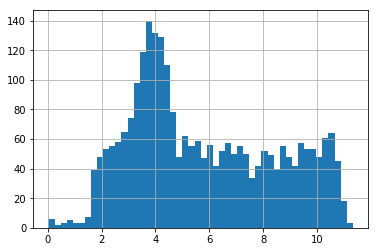


target 1 12.6407394841
45
0.031211347160138694 6.391955102745503 6.396191416679375


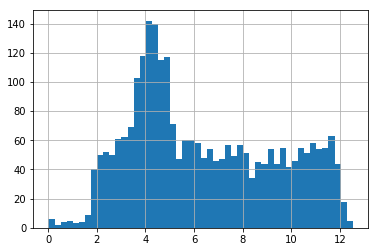


target 2 11.6683749084
45
0.03239485882351492 5.903801633763359 5.902002108108671


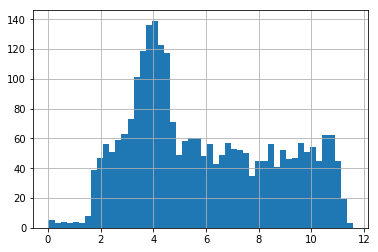


target 3 7.0496431738
45
0.01901046907299934 3.561822350697883 3.563816356313422


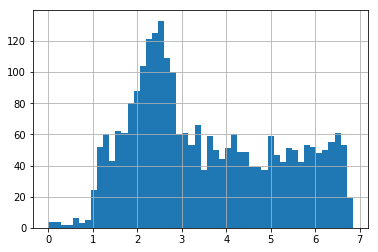


target 4 11.4252837645
45
0.030671184713486642 5.783363844033222 5.78405382570765


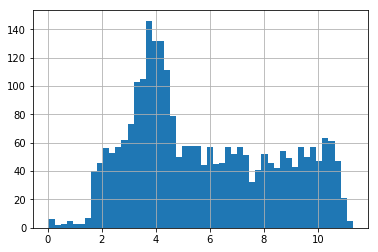


target 5 16.5301977869
30
0.055767704243437306 8.375740526538031 8.368431164783383


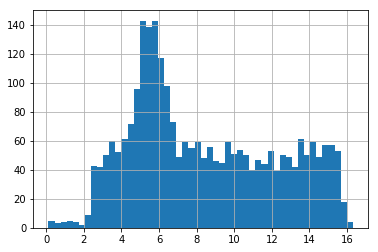


target 6 9.723645757
30
0.025804144049309443 4.916446055307303 4.919978038145158


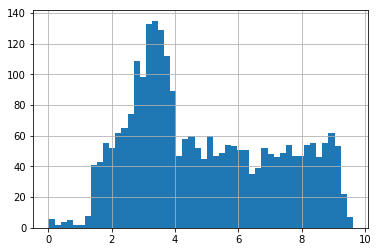


target 7 12.6407394841
30
0.03599204508583763 6.39192305607519 6.39159770110835


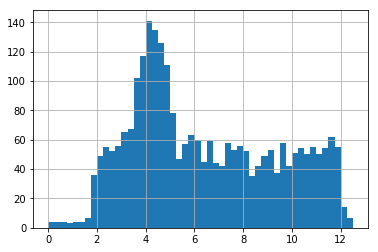


target 8 16.5301977869
30
0.050910979093647925 8.37249016250313 8.372646368975433


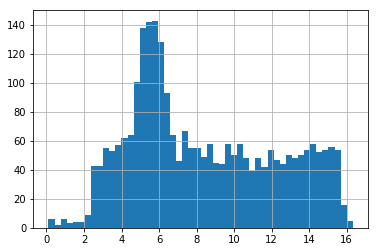

In [56]:
for t in range(len(config.target_lengths)):
    print "\ntarget", t, config.target_lengths[t]
    files= !ls /mnt/lanlep2019/input/sub/{GNO}/{t}/sub{GNO}*
    print len(files)
    b=pd.concat([pd.read_csv(u, index_col=0) for u in files], axis=1)
    b.columns=[  (u.split("/")[-1].split('.')[0]) for u in files]   
    b[b<0]=0
    print np.abs(b.median(1)-b.mean(1)).mean(),b.mean(1).mean(),b.median(1).mean()
    b.mean(1).hist(bins=50);plt.show();
    
    p=b.mean(1).to_frame().reset_index()
    p.columns=['seg_id','time_to_failure']
    fname =os.path.join(sub_path, "{}_sub{}_at{}.csv".format('mean',GNO,t))
    p.to_csv(fname,index=None)
    
    p=b.median(1).to_frame().reset_index()
    p.columns=['seg_id','time_to_failure']
    fname =os.path.join(sub_path, "{}_sub{}_at{}.csv".format('median',GNO,t))
    p.to_csv(fname,index=None)    

    #break

In [57]:
files= !ls /mnt/lanlep2019/input/sub/{GNO}/mean_sub{GNO}_at?.csv
tidx=[ int(u.split('.')[-2][-1]) for u in files]
tweights=np.array([weights[i] for i in tidx])
tweights=tweights/np.sum(tweights)
print len(files),zip(tidx,tweights)

b=pd.concat([pd.read_csv(u, index_col=0) for u in files], axis=1)
b.columns=[  (u.split("/")[-1].split('.')[0]) for u in files]   
b=(b*tweights).sum(1)

p=b.to_frame().reset_index()
p.columns=['seg_id','time_to_failure']
fname =os.path.join(sub_path, os.path.join(sub_path, "weighted_{}_sub{}.csv".format('mean',GNO)))
print p.mean()[0],p.median()[0]
p.to_csv(fname,index=None)

9 [(0, 0.154639175257732), (1, 0.154639175257732), (2, 0.154639175257732), (3, 0.030927835051546396), (4, 0.154639175257732), (5, 0.08247422680412372), (6, 0.030927835051546396), (7, 0.154639175257732), (8, 0.08247422680412372)]
6.321493743232237 5.624042719585128


In [58]:
files= !ls /mnt/lanlep2019/input/sub/{GNO}/median_sub{GNO}_at?.csv
tidx=[ int(u.split('.')[-2][-1]) for u in files]
tweights=np.array([weights[i] for i in tidx])
tweights=tweights/np.sum(tweights)
print len(files),zip(tidx,tweights)

b=pd.concat([pd.read_csv(u, index_col=0) for u in files], axis=1)
b.columns=[  (u.split("/")[-1].split('.')[0]) for u in files]   
b=(b*tweights).sum(1)

p=b.to_frame().reset_index()
p.columns=['seg_id','time_to_failure']
fname =os.path.join(sub_path, os.path.join(sub_path, "weighted_{}_sub{}.csv".format('median',GNO)))
print p.mean()[0],p.median()[0]
p.to_csv(fname,index=None)

9 [(0, 0.154639175257732), (1, 0.154639175257732), (2, 0.154639175257732), (3, 0.030927835051546396), (4, 0.154639175257732), (5, 0.08247422680412372), (6, 0.030927835051546396), (7, 0.154639175257732), (8, 0.08247422680412372)]
6.321453107311332 5.620397069100052
